In [1]:
#Customer Churn Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("Customer_data.xlsx")

# Inspect the data
df.info()
df.head()
df.columns.tolist()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [2]:
# Step 2: Data Cleaning & Preprocessing

# Drop the 'customerID' column as it's not useful for modeling
df.drop('customerID', axis=1, inplace=True)

# Fill missing values in 'TotalCharges' with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Ensure 'TotalCharges' is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


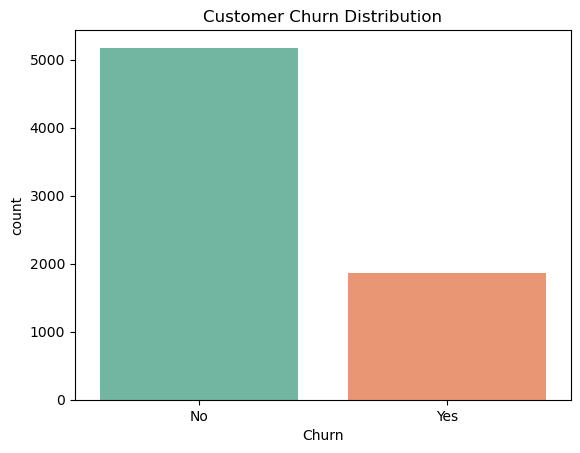

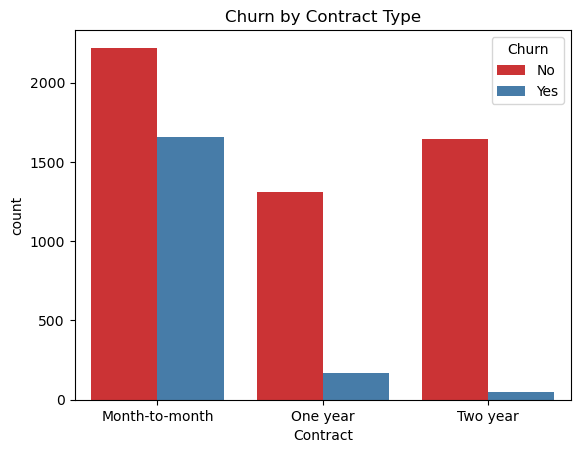

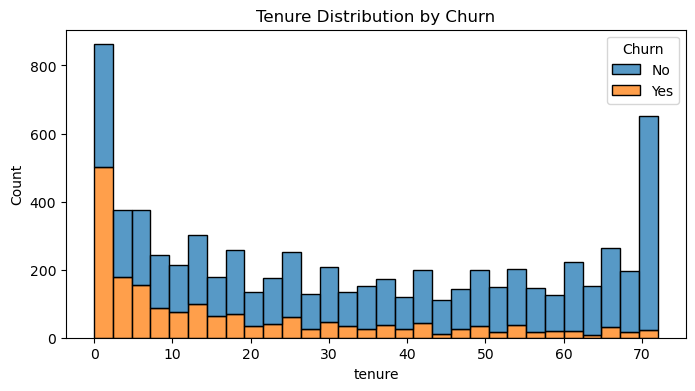

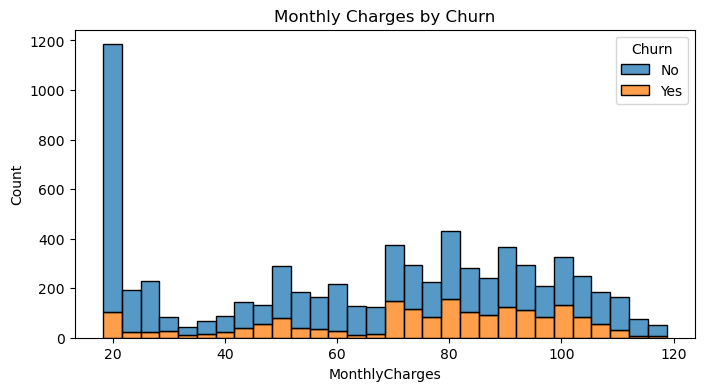

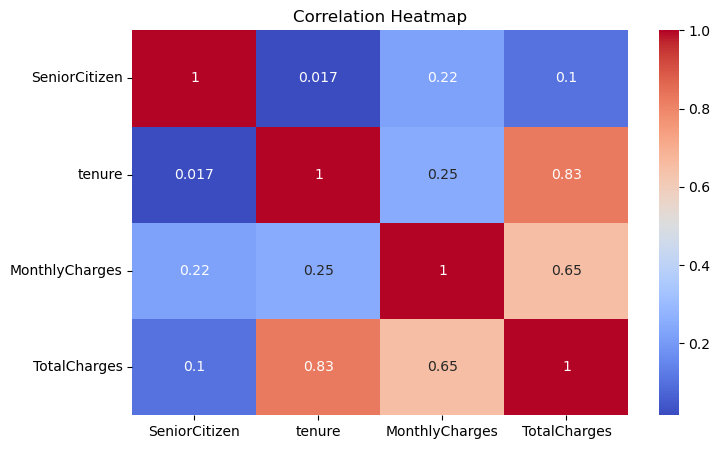

In [3]:
# Step 3: Exploratory Data Analysis (EDA)

# 1. Churn distribution
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

# 2. Churn rate by Contract type
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xticks(rotation=0)
plt.show()

# 3. Tenure distribution by Churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

# 4. MonthlyCharges distribution by Churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Monthly Charges by Churn')
plt.show()

# 5. Correlation heatmap (only for numeric features)
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
df_encoded = df.copy()

# Identify categorical columns
cat_cols = df_encoded.select_dtypes(include='object').columns

# Initialize the encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [5]:
# 1. Split into features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)

# 5. Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8176011355571328

Confusion Matrix:
 [[935 101]
 [156 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [6]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.7984386089425124

Confusion Matrix:
 [[949  87]
 [197 176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [7]:
"""Interpretation:
* Logistic Regression performs slightly better overall, especially for detecting churned customers (class 1), which is the critical part of this problem.
* Random Forest is stronger for non-churned customers, but it misses more churners (recall: 0.47).
"""



'Interpretation:\n* Logistic Regression performs slightly better overall, especially for detecting churned customers (class 1), which is the critical part of this problem.\n* Random Forest is stronger for non-churned customers, but it misses more churners (recall: 0.47).\n'

In [8]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers
}

# Initialize base model
log_model = LogisticRegression(max_iter=1000)

# Grid search
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='f1', n_jobs=-1)
log_grid.fit(X_train, y_train)

# Best model
best_log_model = log_grid.best_estimator_
log_best_pred = best_log_model.predict(X_test)

# Evaluation
print("Best Logistic Regression Parameters:", log_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, log_best_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_best_pred))
print("\nClassification Report:\n", classification_report(y_test, log_best_pred))


Best Logistic Regression Parameters: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.8176011355571328

Confusion Matrix:
 [[935 101]
 [156 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Grid search
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf_model = rf_grid.best_estimator_
rf_best_pred = best_rf_model.predict(X_test)

# Evaluation
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_best_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_best_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_best_pred))


Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8005677785663591

Confusion Matrix:
 [[938  98]
 [183 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.51      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [10]:
""" Customer Churn Prediction – Final Insights
Goal: Predict whether a customer will churn using demographic and service-related features.
Best Model:
✅ Logistic Regression (Tuned)

Accuracy: 81.8%
F1-Score (Churned): 0.63
Recall (Churned): 0.58
→ Best balance of accuracy and ability to detect churners.
Key Influencing Factors (from EDA and modeling):
Contract Type: Month-to-month customers are more likely to churn.
Tenure: Newer customers (low tenure) have a higher churn rate.
MonthlyCharges: Higher charges are slightly associated with more churn.
Online services (like Security/Backup): Their absence increases churn risk.
Business Value:
With this model, the company can proactively identify high-risk customers and take action (e.g., loyalty offers or support) to reduce churn and retain revenue.

"""






' Customer Churn Prediction – Final Insights\nGoal: Predict whether a customer will churn using demographic and service-related features.\nBest Model:\n✅ Logistic Regression (Tuned)\n\nAccuracy: 81.8%\nF1-Score (Churned): 0.63\nRecall (Churned): 0.58\n→ Best balance of accuracy and ability to detect churners.\nKey Influencing Factors (from EDA and modeling):\nContract Type: Month-to-month customers are more likely to churn.\nTenure: Newer customers (low tenure) have a higher churn rate.\nMonthlyCharges: Higher charges are slightly associated with more churn.\nOnline services (like Security/Backup): Their absence increases churn risk.\nBusiness Value:\nWith this model, the company can proactively identify high-risk customers and take action (e.g., loyalty offers or support) to reduce churn and retain revenue.\n\n'